<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 1: Practical - Linear Regression <br> <br>
<font color=686880 size=4>
    TAs: Arman Malekzadeh - Yalda Shabanzadeh - Arshia Soltani Moakhar
    
____



```
# This is formatted as code
```

### Full Name : Parsa Sharifi
### Student Number : 99101762
___

In [1]:
# run this to download the dataset
!wget -O 'dataset.csv' https://www.dropbox.com/s/2ny75tb1ic141yw/assignment1.csv?dl=0

--2023-03-09 12:09:56--  https://www.dropbox.com/s/2ny75tb1ic141yw/assignment1.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2ny75tb1ic141yw/assignment1.csv [following]
--2023-03-09 12:09:56--  https://www.dropbox.com/s/raw/2ny75tb1ic141yw/assignment1.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3a6e56fd9ed0dad317966143a9.dl.dropboxusercontent.com/cd/0/inline/B35MTnp_B_UheVS62Qcj-3M94eIYhltFks_tzosCaDcg81wbq7x7wONbr8fFLtHN-ewg91cD_u9JSZQ92agGp_9YYjHPlI8Gr8D3d86hn6wvFTftKg8DYEtFvOjyvK3kNAz79OokCknKnvAkgciWpoTa1OUJtCgNbIkAmpUqym2gLg/file# [following]
--2023-03-09 12:09:56--  https://uc3a6e56fd9ed0dad317966143a9.dl.dropboxusercontent.com/cd/0/inline/B35MTnp_B_UheVS62Qcj-3M94eIYhltFks_tzosCaDcg81wbq7x7wONbr8fFLtHN-e

In [2]:
# you can use the following libraries
import pandas as pd
import sklearn
import numpy as np
from joblib import dump, load
from matplotlib import pyplot as plt
import os

# Phase 1: Explore

## Sec 1: What do we have here?

load the dataset (as a dataframe) using pandas

In [3]:
df = pd.read_csv('/content/dataset.csv')

display the top rows of the dataframe (top 5 is enough)

In [4]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


print the names of the columns

In [5]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


what values can the `region` column take? print the unique values using pandas

In [6]:
print(df['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


get the number of rows in the dataset

In [7]:
print(df.shape[0])

1338


make a new column named `rounded_bmi` by rounding each value of the column `bmi` | keep the `bmi` column

In [8]:
df['rounded_bmi'] = df['bmi'].round()
print(df.head())

   age     sex     bmi  children smoker     region      charges  rounded_bmi
0   19  female  27.900         0    yes  southwest  16884.92400         28.0
1   18    male  33.770         1     no  southeast   1725.55230         34.0
2   28    male  33.000         3     no  southeast   4449.46200         33.0
3   33    male  22.705         0     no  northwest  21984.47061         23.0
4   32    male  28.880         0     no  northwest   3866.85520         29.0


## Sec 2: Perform EDA

perform EDA on the dataset (e.g., see if there are null values)

In [ ]:
#number of nulls
print(df.isnull().sum())

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
rounded_bmi    0
dtype: int64
age              int64
sex             object
bmi            float64
children         int64
smoker          object
region          object
charges        float64
rounded_bmi    float64
dtype: object
               age          bmi     children       charges  rounded_bmi
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000
mean     39.207025    30.663397     1.094918  13270.422265    30.663677
std      14.049960     6.098187     1.205493  12110.011237     6.096007
min      18.000000    15.960000     0.000000   1121.873900    16.000000
25%      27.000000    26.296250     0.000000   4740.287150    26.000000
50%      39.000000    30.400000     1.000000   9382.033000    30.000000
75%      51.000000    34.693750     2.000000  16639.912515    35.000000
max      64.000000    53.130000     5.000000  63770.428010    53.000000


In [11]:
#data type
print(df.dtypes)

age              int64
sex             object
bmi            float64
children         int64
smoker          object
region          object
charges        float64
rounded_bmi    float64
dtype: object


In [12]:
#this method gets different information of data like std and mean
print(df.describe())

               age          bmi     children       charges  rounded_bmi
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000
mean     39.207025    30.663397     1.094918  13270.422265    30.663677
std      14.049960     6.098187     1.205493  12110.011237     6.096007
min      18.000000    15.960000     0.000000   1121.873900    16.000000
25%      27.000000    26.296250     0.000000   4740.287150    26.000000
50%      39.000000    30.400000     1.000000   9382.033000    30.000000
75%      51.000000    34.693750     2.000000  16639.912515    35.000000
max      64.000000    53.130000     5.000000  63770.428010    53.000000


In [13]:
#get distribution of data

for column in df.columns:
    column_distribution = df[column].value_counts()
    print(column_distribution)

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
male      676
female    662
Name: sex, dtype: int64
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
       

## Sec 3: Do linear relationships exist?

plot `age` against `charges` | **hint**: you can use matplotlibs

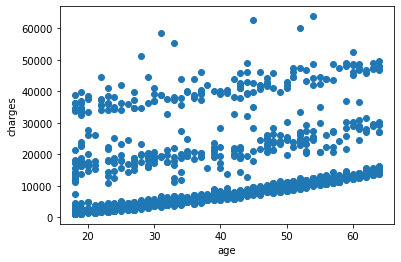

In [14]:
plt.scatter(df['age'], df['charges'])
plt.xlabel('age')
plt.ylabel('charges')

plt.show()

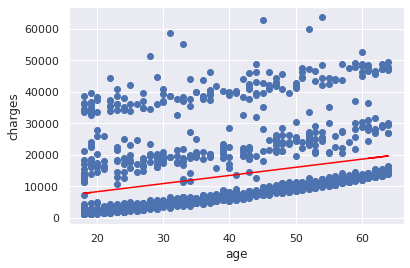

In [20]:
plt.scatter(df['age'], df['charges'])
plt.xlabel('age')
plt.ylabel('charges')

slope, intercept = np.polyfit(df['age'], df['charges'], 1)

plt.plot(df['age'], slope * df['age'] + intercept, color='red')

plt.show()

print the correlation coefficients matrix

In [ ]:
print(df.corr())

                  age       bmi  children   charges  rounded_bmi
age          1.000000  0.109272  0.042469  0.299008     0.109527
bmi          0.109272  1.000000  0.012759  0.198341     0.998920
children     0.042469  0.012759  1.000000  0.067998     0.013915
charges      0.299008  0.198341  0.067998  1.000000     0.198795
rounded_bmi  0.109527  0.998920  0.013915  0.198795     1.000000


# Phase 2: Preprocessing

## Sec 1: Handling Categorical Variables

using one-hot encoding, convert the `region` variable to some numerical variables (the result should be a dataframe)

In [21]:
region_dummies = pd.get_dummies(df['region'], prefix='region')
df_oh_region = pd.concat([df, region_dummies], axis=1)

df_oh_region.drop('region', axis=1, inplace=True)

print(df_oh_region.head())

   age     sex     bmi  children smoker      charges  rounded_bmi  \
0   19  female  27.900         0    yes  16884.92400         28.0   
1   18    male  33.770         1     no   1725.55230         34.0   
2   28    male  33.000         3     no   4449.46200         33.0   
3   33    male  22.705         0     no  21984.47061         23.0   
4   32    male  28.880         0     no   3866.85520         29.0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0  


do the same thing for the `smoker` variable (the result should be a dataframe)

In [22]:
region_dummies = pd.get_dummies(df['smoker'], prefix='smoker')
df_oh_smoker = pd.concat([df, region_dummies], axis=1)

df_oh_smoker.drop('smoker', axis=1, inplace=True)

print(df_oh_smoker.head())

   age     sex     bmi  children     region      charges  rounded_bmi  \
0   19  female  27.900         0  southwest  16884.92400         28.0   
1   18    male  33.770         1  southeast   1725.55230         34.0   
2   28    male  33.000         3  southeast   4449.46200         33.0   
3   33    male  22.705         0  northwest  21984.47061         23.0   
4   32    male  28.880         0  northwest   3866.85520         29.0   

   smoker_no  smoker_yes  
0          0           1  
1          1           0  
2          1           0  
3          1           0  
4          1           0  


do the same thing for the `sex` variable (the result should be a dataframe)

In [23]:
region_dummies = pd.get_dummies(df['sex'], prefix='sex')
df_oh_sex = pd.concat([df, region_dummies], axis=1)

df_oh_sex.drop('sex', axis=1, inplace=True)

print(df_oh_sex.head())

   age     bmi  children smoker     region      charges  rounded_bmi  \
0   19  27.900         0    yes  southwest  16884.92400         28.0   
1   18  33.770         1     no  southeast   1725.55230         34.0   
2   28  33.000         3     no  southeast   4449.46200         33.0   
3   33  22.705         0     no  northwest  21984.47061         23.0   
4   32  28.880         0     no  northwest   3866.85520         29.0   

   sex_female  sex_male  
0           1         0  
1           0         1  
2           0         1  
3           0         1  
4           0         1  


concatenate these new dataframes with the initial one using pandas

In [24]:
df_new = pd.concat([df, df_oh_region, df_oh_smoker, df_oh_sex], axis=1)
print(df_new.head())

   age     sex     bmi  children  smoker     region      charges  rounded_bmi  \
0   19  female  27.900         0     yes  southwest  16884.92400         28.0   
1   18    male  33.770         1      no  southeast   1725.55230         34.0   
2   28    male  33.000         3      no  southeast   4449.46200         33.0   
3   33    male  22.705         0      no  northwest  21984.47061         23.0   
4   32    male  28.880         0      no  northwest   3866.85520         29.0   

   age     sex  ...  smoker_yes  age     bmi  children  smoker     region  \
0   19  female  ...           1   19  27.900         0     yes  southwest   
1   18    male  ...           0   18  33.770         1      no  southeast   
2   28    male  ...           0   28  33.000         3      no  southeast   
3   33    male  ...           0   33  22.705         0      no  northwest   
4   32    male  ...           0   32  28.880         0      no  northwest   

       charges  rounded_bmi  sex_female  sex_male 

In [25]:
df_new.drop('sex', axis=1, inplace=True)
df_new.drop('smoker', axis=1, inplace=True)
df_new.drop('region', axis=1, inplace=True)
df_new = df_new.loc[:,~df_new.columns.duplicated()].copy()
print(df_new.head())
print(df_new.shape)

   age     bmi  children      charges  rounded_bmi  region_northeast  \
0   19  27.900         0  16884.92400         28.0                 0   
1   18  33.770         1   1725.55230         34.0                 0   
2   28  33.000         3   4449.46200         33.0                 0   
3   33  22.705         0  21984.47061         23.0                 0   
4   32  28.880         0   3866.85520         29.0                 0   

   region_northwest  region_southeast  region_southwest  smoker_no  \
0                 0                 0                 1          0   
1                 0                 1                 0          1   
2                 0                 1                 0          1   
3                 1                 0                 0          1   
4                 1                 0                 0          1   

   smoker_yes  sex_female  sex_male  
0           1           1         0  
1           0           0         1  
2           0           0       

## Sec 2: Normalization

normalize the columns `age`, `bmi`, and `children` | after this, they should take values between 0 and 1

In [26]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['age', 'bmi', 'children']

scaler = MinMaxScaler()

df_new[columns_to_normalize] = scaler.fit_transform(df_new[columns_to_normalize])
print(df_new.head())

        age       bmi  children      charges  rounded_bmi  region_northeast  \
0  0.021739  0.321227       0.0  16884.92400         28.0                 0   
1  0.000000  0.479150       0.2   1725.55230         34.0                 0   
2  0.217391  0.458434       0.6   4449.46200         33.0                 0   
3  0.326087  0.181464       0.0  21984.47061         23.0                 0   
4  0.304348  0.347592       0.0   3866.85520         29.0                 0   

   region_northwest  region_southeast  region_southwest  smoker_no  \
0                 0                 0                 1          0   
1                 0                 1                 0          1   
2                 0                 1                 0          1   
3                 1                 0                 0          1   
4                 1                 0                 0          1   

   smoker_yes  sex_female  sex_male  
0           1           1         0  
1           0           0   

# Phase 3: Training

## Sec 1: Making X and Y

make a new dataframe by removing the following columns: "rounded_bmi", "charges" 
| note: do not remove the previous dataframe

In [27]:
df_removed = df_new.drop(columns=['rounded_bmi', 'charges'])

convert the new dataframe into a numpy array named "x"

In [28]:
x = df_removed.to_numpy()
print(x)

[[0.02173913 0.3212268  0.         ... 1.         1.         0.        ]
 [0.         0.47914985 0.2        ... 0.         0.         1.        ]
 [0.2173913  0.45843422 0.6        ... 0.         0.         1.        ]
 ...
 [0.         0.56201238 0.         ... 0.         1.         0.        ]
 [0.06521739 0.26472962 0.         ... 0.         1.         0.        ]
 [0.93478261 0.35270379 0.         ... 1.         1.         0.        ]]


get the "charges" column from the previous dataframe and convert it to another numpy array named "y"

In [29]:
y = df_new['charges'].to_numpy()
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


## Sec 2: Splitting the Data

divide the dataset into two portions in a way that 90% of the data belongs to the "training" set (called `x_train`, `y_train`) and the remaining belongs to the "testing" set (called `x_test`, `y_test`)

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [31]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1204, 11)
y_train shape: (1204,)
x_test shape: (134, 11)
y_test shape: (134,)


## Sec 3 (Optional): Linear Regression from Scratch

Complete this section with your code.

**hint**: 
- use pseudo inverse if matrix is not invertible.
- you can use `np.linalg`.

**note**:
- do **Phase 3:Sec 4** and **Phase 4:all sections** with this model also, then compare your results. 

In [81]:
# I used yaser abu mostafa course https://www.youtube.com/watch?v=FIbVs5GbBlQ for the optimal solution formula

import numpy as np

class LinearRegression_:
    """
    Fits a linear regression model to data, then uses predict to get results.
    """

    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        """Fit the training data
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """
        n_samples, n_features = X.shape
        alpha = .1

        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        X_T = X.T

        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X_T, X) + alpha * np.identity(n_features)), X_T), y)
        self.bias = np.mean(y) - np.dot(np.mean(X, axis=0), self.weights)

        return self
    
    def predict(self, X):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """

        y_pred = np.dot(X, self.weights) + self.bias

        return y_pred


## Sec 4: The real deal!

fit a linear regressor to the data. (Use both regressors - sklearn & from scratch - if you did previous part)

In [82]:
from sklearn.linear_model import LinearRegression
trained_model = LinearRegression().fit(x_train, y_train)

In [83]:
my_model = LinearRegression_()
my_model.fit(x_train, y_train)

get the coefficients of the variables

In [35]:
print(trained_model.coef_)

[ 1.19082763e+04  1.22729510e+04  2.20439695e+03  1.58328855e+16
  1.58328855e+16  1.58328855e+16  1.58328855e+16 -2.66871766e+17
 -2.66871766e+17  8.66004362e+16  8.66004362e+16]


In [37]:
print(my_model.weights)

[11924.6401069  12167.41256821  2216.423662    2421.85484325
  2129.3442563   1585.70798622  1554.04975553 -8119.48835014
 15810.44519404  3978.17019156  3712.78665248]


get the bias value associated with the model

In [38]:
print(trained_model.intercept_)

1.644384441026396e+17


In [39]:
print(my_model.bias)

0.006387670529875322


## Sec 5: Save/Load the model

Save

In [ ]:
filename = "model.joblib"
dump(trained_model, filename)

['model.joblib']

Load

In [ ]:
loaded_model = load(filename)

# Phase 4: Evaluation

predict the value of "y" for each "x" belonging to the "testing" set

In [40]:
y_prediction = trained_model.predict(x_test)
y_prediction_my_model = my_model.predict(x_test)

compute the mean squared error

In [41]:
from sklearn.metrics import mean_squared_error

mse_error = mean_squared_error(y_test, y_prediction)
mse_error_my_model = mean_squared_error(y_test, y_prediction_my_model)

In [42]:
print(mse_error)
print(mse_error_my_model)

32216909.2710215
32275883.56559308


return the coefficient of determination of the prediction

In [43]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_prediction)
print(r2)

0.7664684899657155


In [44]:
r2 = r2_score(y_test, y_prediction_my_model)
print(r2)

0.7660410015325871


predict the value of "y" only for the last entry of the "testing" set

In [45]:
last_x = x_test[-1:]
last_y_prediction = trained_model.predict(last_x)

In [49]:
print(last_y_prediction)

[12672.]


In [47]:
last_x = x_test[-1:]
last_y_prediction_my_model = my_model.predict(last_x)

In [48]:
print(last_y_prediction_my_model)

[12587.76482773]


# Phase 5 (Optional): Submit your predictions to our Kaggle competition

Competition Link: https://www.kaggle.com/t/77b2fa437095401088e51c73956556ff<br>
You'll have to make a csv file containing two columns: `ID` and `charges`, and submit the file.<br>

In [58]:
data = pd.read_csv('/content/assignment1-test-data.csv')

data = data.drop('ID', axis=1)

print(data.head())

   age     sex        bmi  children smoker     region
0   37  female  30.478194         1     no  southeast
1   34  female  46.052982         2     no  southeast
2   63    male  40.342375         0     no  southeast
3   51  female  28.427689         0     no  southwest
4   25    male  16.891723         0     no  northwest


In [59]:
region_dummies = pd.get_dummies(data['region'], prefix='region')
df_oh_region = pd.concat([data, region_dummies], axis=1)

df_oh_region.drop('region', axis=1, inplace=True)

print(df_oh_region.head())

   age     sex        bmi  children smoker  region_northeast  \
0   37  female  30.478194         1     no                 0   
1   34  female  46.052982         2     no                 0   
2   63    male  40.342375         0     no                 0   
3   51  female  28.427689         0     no                 0   
4   25    male  16.891723         0     no                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 1                 0  
1                 0                 1                 0  
2                 0                 1                 0  
3                 0                 0                 1  
4                 1                 0                 0  


In [61]:
region_dummies = pd.get_dummies(data['smoker'], prefix='smoker')
df_oh_smoker = pd.concat([data, region_dummies], axis=1)

df_oh_smoker.drop('smoker', axis=1, inplace=True)

print(df_oh_smoker.head())

   age     sex        bmi  children     region  smoker_no  smoker_yes
0   37  female  30.478194         1  southeast          1           0
1   34  female  46.052982         2  southeast          1           0
2   63    male  40.342375         0  southeast          1           0
3   51  female  28.427689         0  southwest          1           0
4   25    male  16.891723         0  northwest          1           0


In [62]:
region_dummies = pd.get_dummies(data['sex'], prefix='sex')
df_oh_sex = pd.concat([data, region_dummies], axis=1)

df_oh_sex.drop('sex', axis=1, inplace=True)

print(df_oh_sex.head())

   age        bmi  children smoker     region  sex_female  sex_male
0   37  30.478194         1     no  southeast           1         0
1   34  46.052982         2     no  southeast           1         0
2   63  40.342375         0     no  southeast           0         1
3   51  28.427689         0     no  southwest           1         0
4   25  16.891723         0     no  northwest           0         1


In [63]:
df_new = pd.concat([data, df_oh_region, df_oh_smoker, df_oh_sex], axis=1)
print(df_new.head())

   age     sex        bmi  children smoker     region  age     sex        bmi  \
0   37  female  30.478194         1     no  southeast   37  female  30.478194   
1   34  female  46.052982         2     no  southeast   34  female  46.052982   
2   63    male  40.342375         0     no  southeast   63    male  40.342375   
3   51  female  28.427689         0     no  southwest   51  female  28.427689   
4   25    male  16.891723         0     no  northwest   25    male  16.891723   

   children  ...     region  smoker_no  smoker_yes  age        bmi  children  \
0         1  ...  southeast          1           0   37  30.478194         1   
1         2  ...  southeast          1           0   34  46.052982         2   
2         0  ...  southeast          1           0   63  40.342375         0   
3         0  ...  southwest          1           0   51  28.427689         0   
4         0  ...  northwest          1           0   25  16.891723         0   

  smoker     region  sex_female 

In [64]:
df_new.drop('sex', axis=1, inplace=True)
df_new.drop('smoker', axis=1, inplace=True)
df_new.drop('region', axis=1, inplace=True)
df_new = df_new.loc[:,~df_new.columns.duplicated()].copy()
print(df_new.head())
print(df_new.shape)

   age        bmi  children  region_northeast  region_northwest  \
0   37  30.478194         1                 0                 0   
1   34  46.052982         2                 0                 0   
2   63  40.342375         0                 0                 0   
3   51  28.427689         0                 0                 0   
4   25  16.891723         0                 0                 1   

   region_southeast  region_southwest  smoker_no  smoker_yes  sex_female  \
0                 1                 0          1           0           1   
1                 1                 0          1           0           1   
2                 1                 0          1           0           0   
3                 0                 1          1           0           1   
4                 0                 0          1           0           0   

   sex_male  
0         0  
1         0  
2         1  
3         0  
4         1  
(100, 11)


In [65]:
from sklearn.preprocessing import MinMaxScaler
cols_to_normalize = ['age', 'bmi', 'children']

scaler = MinMaxScaler()

df_new[cols_to_normalize] = scaler.fit_transform(df_new[cols_to_normalize])
print(df_new.head())

        age       bmi  children  region_northeast  region_northwest  \
0  0.434783  0.445223       0.2                 0                 0   
1  0.369565  0.955602       0.4                 0                 0   
2  1.000000  0.768468       0.0                 0                 0   
3  0.739130  0.378029       0.0                 0                 0   
4  0.173913  0.000000       0.0                 0                 1   

   region_southeast  region_southwest  smoker_no  smoker_yes  sex_female  \
0                 1                 0          1           0           1   
1                 1                 0          1           0           1   
2                 1                 0          1           0           0   
3                 0                 1          1           0           1   
4                 0                 0          1           0           0   

   sex_male  
0         0  
1         0  
2         1  
3         0  
4         1  


In [66]:
x = df_new.to_numpy()
print(x.shape)

(100, 11)


In [84]:
result = my_model.predict(x)
print(result)

[ 8491.79533088 14353.01144265 18444.21697492 10826.14439444
  -189.88168147 40829.79587359 25994.8287533   7580.2287407
  1381.66411431 12167.05586932 12246.88510259 31466.98169699
  7679.78886619 31804.56607202  8104.10169975  8857.85955117
 11896.61156979  5294.24747362 12503.12651239 10226.64850731
 -1788.52566503 40828.90014467  8737.39265811  9356.49062559
  4732.94797953 12479.21816008  6760.19755092 41149.76209293
   121.20498298  1284.10325777 38175.91537948  3478.70137938
 15470.39979164  1592.6114603    840.72407081  7781.5630248
  9822.84319855  1250.03507854 12817.0864736  42331.17554921
 10635.68192401  8248.62097059 19176.92907571 12976.88380655
 37408.64826331 14438.05041091 36307.07515829  5634.19330132
 13337.72567731  8791.72641333 41986.52807687 11021.12383729
  6957.0689683  39808.78807645 12254.63803506 35461.13271788
 10832.01027383  4536.12520734 15404.96821031 14924.17825433
 15796.74710973  8419.13157067  3912.13965573  2904.53665484
 10580.11849046 11382.2412

In [74]:
result = trained_model.predict(x)
print(result)

[ 8512. 14464. 18496. 10880.  -192. 40832. 25888.  7616.  1408. 12224.
 12352. 31360.  7712. 31808.  8128.  8832. 11904.  5312. 12512. 10304.
 -1792. 40864.  8832.  9408.  4736. 12512.  6848. 41120.    96.  1344.
 38144.  3520. 15488.  1600.   864.  7840.  9792.  1280. 12864. 42304.
 10656.  8288. 19264. 12992. 37408. 14464. 36320.  5696. 13376.  8832.
 41952. 11072.  7040. 39712. 12352. 35392. 10880.  4576. 15520. 14976.
 15872.  8448.  3968.  2944. 10624. 11456.  6080. 16576.  5760. 16160.
 15296.  6208.  5440. 10752. 13376. 24768.  8192. 11456. 36448.  6464.
  4288. 27936.  1344. 15040.  2176.  5536. 15008.  4352.  3392.  3968.
  4736. 11264.  4224. 30720. 34176. 12480.  9088. 10176. 24928.  3392.]


In [75]:
print(result.shape)

(100,)


In [76]:
id = np.arange(1, 101, dtype=np.int32)
print(type(id[0]))

<class 'numpy.int32'>


In [85]:
concatenated_array = np.concatenate((id.reshape(-1,1), result.reshape(-1,1)), axis=1)

# Create a DataFrame from the concatenated array
df_ = pd.DataFrame(concatenated_array, columns=['ID', 'charges'])
print(df_)


       ID       charges
0     1.0   8491.795331
1     2.0  14353.011443
2     3.0  18444.216975
3     4.0  10826.144394
4     5.0   -189.881681
..    ...           ...
95   96.0  12459.414870
96   97.0   9050.104679
97   98.0  10143.593883
98   99.0  24972.897890
99  100.0   3323.346508

[100 rows x 2 columns]


In [86]:
df_['ID'] = df_['ID'].astype('int32')

In [87]:
resulta = df_.dtypes

print("Output:")
print(resulta)

Output:
ID           int32
charges    float64
dtype: object


In [88]:
df_.to_csv('output_.csv', index=False)